In [0]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import statsmodels.api as sm
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
import pandas.util.testing as tm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
%matplotlib inline

In [30]:
dataset = pd.read_csv('winequality-red.csv', sep=';', encoding='cp1251')

dataset.shape

(1599, 12)

In [32]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


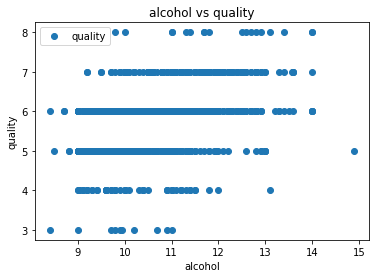

In [33]:
dataset.plot(x='alcohol', y='quality', style='o')  
plt.title('alcohol vs quality')  
plt.xlabel('alcohol')  
plt.ylabel('quality')  
plt.show()

In [34]:
X = dataset['alcohol'].values.reshape(-1,1)
y = dataset['quality'].values.reshape(-1,1)
reg = LinearRegression()
reg.fit(X, y)
print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

The linear model is: Y = 1.875 + 0.36084X


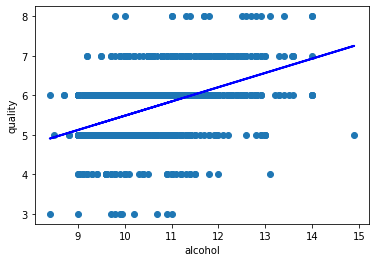

In [35]:
predictions = reg.predict(X)
plt.figure()
plt.scatter(
    dataset['alcohol'],
    dataset['quality'],
)
plt.plot(
    dataset['alcohol'],
    predictions,
    c='blue',
    linewidth=2
)
plt.xlabel("alcohol")
plt.ylabel("quality")
plt.show()

In [36]:
X = dataset['alcohol']
y = dataset['quality']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     468.3
Date:                Thu, 14 May 2020   Prob (F-statistic):           2.83e-91
Time:                        21:11:05   Log-Likelihood:                -1721.1
No. Observations:                1599   AIC:                             3446.
Df Residuals:                    1597   BIC:                             3457.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8750      0.175     10.732      0.0

Для белого вина

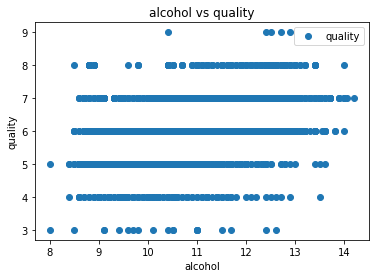

The linear model is: Y = 2.582 + 0.31347X


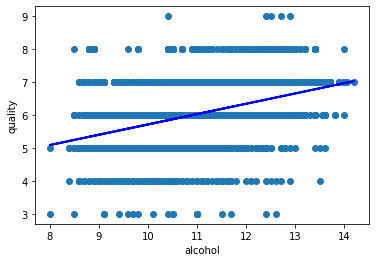

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     1146.
Date:                Thu, 14 May 2020   Prob (F-statistic):          5.61e-226
Time:                        21:21:17   Log-Likelihood:                -5839.4
No. Observations:                4898   AIC:                         1.168e+04
Df Residuals:                    4896   BIC:                         1.170e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5820      0.098     26.345      0.0

In [54]:
dataset2 = pd.read_csv('winequality-white.csv', sep=';', encoding='cp1251')


dataset2.plot(x='alcohol', y='quality', style='o')  
plt.title('alcohol vs quality')  
plt.xlabel('alcohol')  
plt.ylabel('quality')  
plt.show()

X = dataset2['alcohol'].values.reshape(-1,1)
y = dataset2['quality'].values.reshape(-1,1)
reg = LinearRegression()
reg.fit(X, y)
print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

predictions = reg.predict(X)
plt.figure()
plt.scatter(
    dataset2['alcohol'],
    dataset2['quality'],
)
plt.plot(
    dataset2['alcohol'],
    predictions,
    c='blue',
    linewidth=2
)
plt.xlabel("alcohol")
plt.ylabel("quality")
plt.show()

X = dataset2['alcohol']
y = dataset2['quality']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())



---



---



---



---



In [0]:
def normalise(data):
    for i in range(len(data[0][0])):
        tempmax = 0
        for j in range(len(data)):
            tempmax = max(tempmax,data[j][0][i])
        for j in range(len(data)):
            data[j][0][i] /= tempmax
    return data 

In [0]:
def createData(df, dimentions,Class, norm):
  data = []
  for index, row in df.iterrows():
      temp = [] 
      for i in range(len(dimentions)):
          temp.append(row[dimentions[i]])
      temp.append(int(row[Class]))
      data.append(temp)
  
  if (norm):
	  data = normalise(data)

  print("Пример данных:", data[0])
  print("Кол-во данных:", len(data))
  return data

In [0]:
def showData(data):
  pl.scatter([data[i][0] for i in range(len(data))],
                 [data[i][1] for i in range(len(data))],
                 c=[data[i][len(data[i])-1] for i in range(len(data))])
  pl.show() 

In [0]:
def splitData(data, persent):
  trainData = []
  testData  = []
  for row in data:
      if random.random() < persent:
          testData.append(row)
      else:
          trainData.append(row)
  print ("Длинна тестовой выборки:",len(testData))
  print ("Длинна тренировочной выборки:",len(trainData))
  return trainData, testData

In [0]:
def gini_index(groups, classes):
	n_instances = float(sum([len(group) for group in groups]))
	gini = 0.0
	for group in groups:
		size = float(len(group))
		if size == 0:
			continue
		score = 0.0
		for class_val in classes:
			p = [row[-1] for row in group].count(class_val) / size
			score += p * p
		gini += (1.0 - score) * (size / n_instances)
	return gini

In [0]:
def test_split(index, value, dataset):
	left, right = list(), list()
	for row in dataset:
		if row[index] < value:
			left.append(row)
		else:
			right.append(row)
	return left, right

In [0]:
def get_split(dataset):
	class_values = list(set(row[-1] for row in dataset))
	b_index, b_value, b_score, b_groups = 999, 999, 999, None
	for index in range(len(dataset[0])-1):
		for row in dataset:
			groups = test_split(index, row[index], dataset)
			gini = gini_index(groups, class_values)
			if gini < b_score:
				b_index, b_value, b_score, b_groups = index, row[index], gini, groups
	return {'index':b_index, 'value':b_value, 'groups':b_groups}

In [0]:
def to_terminal(group):
	outcomes = [row[-1] for row in group]
	return max(set(outcomes), key=outcomes.count)

In [0]:
def split(node, max_depth, min_size, depth):
	left, right = node['groups']
	del(node['groups'])
	if not left or not right:
		node['left'] = node['right'] = to_terminal(left + right)
		return
	if depth >= max_depth:
		node['left'], node['right'] = to_terminal(left), to_terminal(right)
		return
	if len(left) <= min_size:
		node['left'] = to_terminal(left)
	else:
		node['left'] = get_split(left)
		split(node['left'], max_depth, min_size, depth+1)
	if len(right) <= min_size:
		node['right'] = to_terminal(right)
	else:
		node['right'] = get_split(right)
		split(node['right'], max_depth, min_size, depth+1)

In [0]:
def build_tree(train, max_depth, min_size):
	start_time = time.time()
	root = get_split(train)
	split(root, max_depth, min_size, 1)
	delta_time = time.time() - start_time
	print ('Время выполнения: ', delta_time)
	return root

In [0]:
def print_tree(node, depth=1):
	if isinstance(node, dict):
		print('%s[X%d < %.3f]' % ((depth*' ', (node['index']+1), node['value'])))
		print_tree(node['left'], depth+1)
		print_tree(node['right'], depth+1)
	else:
		print('%s[%s]' % ((depth*' ', node)))

In [0]:
def predict_by_tree(tree, data):
  labels = []
  for row in data:
    subtree = tree
    while True:
      if row[subtree['index']] < subtree['value']:
        if isinstance(subtree['left'], dict):
          subtree = subtree['left']
        else:
          labels.append(subtree['left'])
          break
      else:
        if isinstance(subtree['right'], dict):
          subtree = subtree['right']
        else:
          labels.append(subtree['right'])
          break
  return labels

In [0]:
def accCheck(testData,newTest):
  accuracy = 0
  for i in range(len(testData)):
    if testData[i][len(testData[i])-1] == newTest[i]:
      accuracy += 1
  accuracy /= len(testData)
  print("Точность предугадывания: ", accuracy)